      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9
       Dates  Prices
0 2020-10-31    10.1
1 2020-11-30    10.3
2 2020-12-31    11.0
3 2021-01-31    10.9
4 2021-02-28    10.9


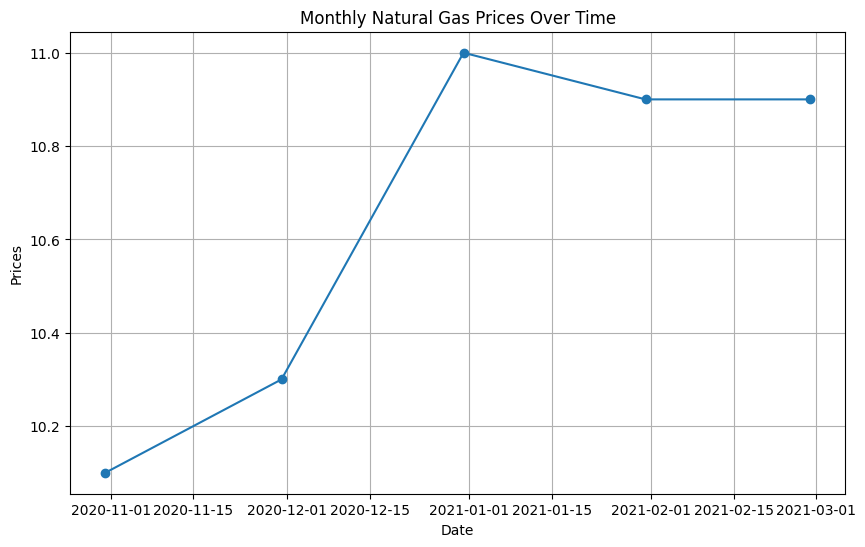

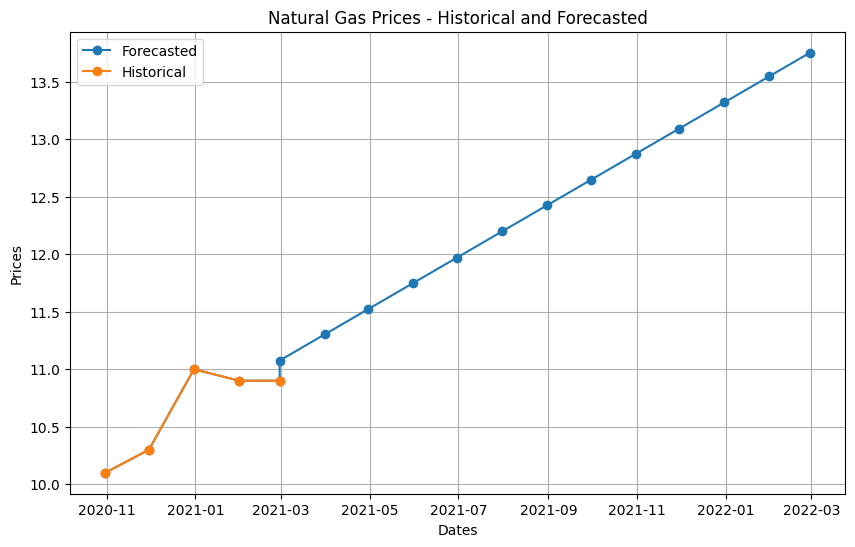

21.69038933707452


In [35]:
import pandas as pd
df = pd.read_csv('Nat_Gas.csv')
print(df.head())

# Define your dataset
data = {
    'Dates': ['10/31/20', '11/30/20', '12/31/20', '01/31/21', '02/28/21'],
    'Prices': [10.1, 10.3, 11.0, 10.9, 10.9]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Dates' to datetime with explicit format
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')

# Output the DataFrame
print(df)

import matplotlib.pyplot as plt
# create a plot to visualise the data
plt.figure(figsize=(10,6))
plt.plot(df['Dates'],df['Prices'],marker='o')
plt.title('Monthly Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid(True)
plt.show()
df['Date_ordinal']= df['Dates'].apply(lambda date: date.toordinal())
from sklearn.linear_model import LinearRegression
# create X and y for the model
X= df['Date_ordinal'].values.reshape(-1,1)
y= df['Prices'].values
#create the linear regression model and train it
model = LinearRegression()
model.fit(X,y)
import pandas as pd
import numpy as np  # Import numpy for reshaping

# Generate future dates for the next 12 months
future_dates = pd.date_range(df['Dates'].max(), periods=13, freq='M')

# Convert future dates into ordinals
future_dates_ordinal = future_dates.map(lambda date: date.toordinal())

# Predict future prices
predicted_prices = model.predict(future_dates_ordinal.values.reshape(-1, 1))

# Create a new DataFrame with future dates and predicted prices
future_df = pd.DataFrame({'Dates': future_dates, 'Prices': predicted_prices})

# Combine the historical data and future predictions
combined_df = pd.concat([df[['Dates', 'Prices']], future_df])
# Plot historical and predicted prices
plt.figure(figsize=(10,6))
plt.plot(combined_df['Dates'], combined_df['Prices'], marker='o', label='Forecasted')
plt.plot(df['Dates'], df['Prices'], marker='o', label='Historical')
plt.title('Natural Gas Prices - Historical and Forecasted')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()
# Create a function to estimate the price for a specific date
def estimate_price(input_date):
    input_date_ordinal = pd.to_datetime(input_date).toordinal()
    estimated_price = model.predict([[input_date_ordinal]])
    return estimated_price[0]
# Create a function to estimate the price for a specific date
def estimate_price(input_date):
    input_date_ordinal = pd.to_datetime(input_date).toordinal()
    estimated_price = model.predict([[input_date_ordinal]])
    return estimated_price[0]

# Example usage:
print(estimate_price('2025-02-15'))
